In [1]:
!pip install tensorflow-gpu==2.0.0-beta1

In [2]:
import tensorflow as tf
tf.__version__

'2.0.0-beta1'

Tensor 자료형의 연산은 TensorFlow가 제공하는 연산자를 사용해야 한다. 이 연산자의 이름은 NumPy나 SciPy에서 제공하는 연산자와 다르므로 별도로 외워야 한다.

## 기본 연산

다음과 같은 기본 연산은 특수 메서드를 이용하여 연산자 오버로딩이 되어 있으므로 그냥 연산자 기호를 사용해도 된다.

+ tf.add: 덧셈
+ tf.subtract: 뺄셈
+ tf.multiply: 곱셈
+ tf.divide: 나눗셈
+ tf.pow: n-제곱
+ tf.negative: 음수 부호

In [3]:
a = tf.range(6, dtype=tf.int32)
b = 2 * tf.ones(6, dtype=tf.int32)

tf.add(a, b).numpy()

array([2, 3, 4, 5, 6, 7], dtype=int32)

In [4]:
(a + b).numpy()

array([2, 3, 4, 5, 6, 7], dtype=int32)

In [5]:
(a - b).numpy()

array([-2, -1,  0,  1,  2,  3], dtype=int32)

In [6]:
(a * b).numpy()

array([ 0,  2,  4,  6,  8, 10], dtype=int32)

In [7]:
(a / b).numpy()

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

In [8]:
(a ** 2).numpy()

array([ 0,  1,  4,  9, 16, 25], dtype=int32)

In [9]:
(-b).numpy()

array([-2, -2, -2, -2, -2, -2], dtype=int32)

연산자 오버로딩이 불가능한 연산은 사용할 때 주의한다.

+ tf.abs: 절대값
+ tf.sign: 부호
+ tf.round: 반올림
+ tf.ceil: 올림
+ tf.floor: 내림
+ tf.square: 제곱
+ tf.sqrt: 제곱근
+ tf.maximum: 두 텐서의 각 원소에서 최댓값만 반환.
+ tf.minimum: 두 텐서의 각 원소에서 최솟값만 반환.
+ tf.cumsum: 누적합
+ tf.cumprod: 누적곱

In [10]:
tf.maximum(a, b).numpy()

array([2, 2, 2, 3, 4, 5], dtype=int32)

벡터나 행렬의 원소들을 연산하여 스칼라 값을 구하는 차원 축소 연산은 **tf.reduce_** 명령을 사용한다.

* **tf.reduce_all**: 설정한 축으로 이동하면서 **and**논리 연산을 수행한다.
* **tf.reduce_any**: 설정한 축으로 이동하면서 **or**논리 연산을 수행한다.
* **tf.reduce_mean**: 설정한 축의 평균을 구한다.
* **tf.reduce_max**: 설정한 축의 최댓값을 구한다.
* **tf.reduce_min**: 설정한 축의 최솟값을 구한다.
* **tf.reduce_prod**: 설정한 축의 요소를 모두 곱한 값을 구한다.
* **tf.reduce_sum**: 설정한 축의 요소를 모두 더한 값을 구한다.
* **tf.reduce_logsumexp**: 설정한 축의 벡터가  𝑁 차원의 벡터  𝑥 라고 할 때


$$\log \left( \displaystyle\sum_{i=0}^N \exp x_i\right)$$

In [11]:
tf.reduce_sum(a).numpy()

15

## 자동 형변환
TensorFlow 연산자에 NumPy 배열이 들어가면 **자동으로 상수 텐서 자료형으로 형변환(coercion)**되어 연산이 이루어진다.

In [12]:
import numpy as np

a = np.ones((2, 3), dtype=np.float32)
b = tf.ones((3, 1), dtype=tf.float32)
tf.matmul(a, b).numpy()

array([[3.],
       [3.]], dtype=float32)

## 행렬 연산
또한 행렬과 관련된 연산에서도 NumPy와는 이름이 다르므로 주의한다.

* tf.matmul: 내적
* tf.linalg.inv: 역행렬

In [13]:
a = tf.constant([[2, 0], [0, 1]], dtype=tf.float32)
b = tf.constant([[1, 1], [1, 1]], dtype=tf.float32)
tf.matmul(a, b).numpy()

array([[2., 2.],
       [1., 1.]], dtype=float32)

In [14]:
tf.linalg.inv(a).numpy()

array([[0.5, 0. ],
       [0. , 1. ]], dtype=float32)

## 신경망 함수

**nn 서브패키지**에는 신경망에서 쓰이는 함수들도 구현되어 있다.

* tf.nn.sigmoid: 로지스틱 함수
* tf.nn.softplus: 소프트플러스 함수
* tf.nn.softsign: 소프트사인 함수

In [15]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [0]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)

fm._rebuild()


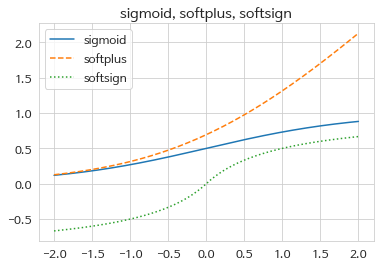

In [17]:
x = tf.linspace(-2.0, 2, 1000)
y1 = tf.nn.sigmoid(x)
y2 = tf.nn.softplus(x)
y3 = tf.nn.softsign(x)

plt.plot(x, y1, "-", label='sigmoid')
plt.plot(x, y2, "--", label='softplus')
plt.plot(x, y3, ":", label="softsign")
plt.title("sigmoid, softplus, softsign")
plt.legend()
plt.show()

## 선형회귀 모형


In [18]:
w0 = tf.constant([[3.0], [5.0]])
w0.numpy()

array([[3.],
       [5.]], dtype=float32)

In [19]:
X = tf.concat([tf.ones((10, 1)), tf.random.normal((10, 1))], 1)
X.numpy()

array([[ 1.        , -0.4800332 ],
       [ 1.        , -0.19489679],
       [ 1.        , -0.8455272 ],
       [ 1.        , -0.34257528],
       [ 1.        , -0.08664989],
       [ 1.        ,  0.6556776 ],
       [ 1.        , -0.54258955],
       [ 1.        , -1.6698743 ],
       [ 1.        , -0.6408087 ],
       [ 1.        ,  0.5068698 ]], dtype=float32)

In [22]:
y_target = tf.matmul(X, w0) + tf.random.normal((10, 1))
y_target.numpy()

array([[-2.7346021e-01],
       [ 3.2076836e+00],
       [ 4.6834946e-03],
       [ 1.3112352e+00],
       [ 2.2626908e+00],
       [ 7.3667765e+00],
       [ 1.7517534e-01],
       [-5.5939569e+00],
       [-6.8858182e-01],
       [ 6.0076771e+00]], dtype=float32)

In [23]:
w = tf.constant([[0.0], [0.0]])
y_predict = tf.matmul(X, w)
y_predict.numpy()

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

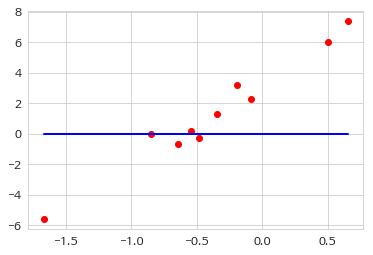

In [24]:
plt.plot(X[:, 1], y_target, 'ro')
plt.plot(X[:, 1], y_predict, 'b-')
plt.show()

In [25]:
loss = tf.reduce_sum(tf.square(y_target - y_predict))
loss.numpy()

139.3619

In [26]:
w = tf.constant([[3.0], [3.0]])
y_predict = tf.matmul(X, w)
y_predict.numpy()

array([[ 1.5599004 ],
       [ 2.4153097 ],
       [ 0.46341848],
       [ 1.9722742 ],
       [ 2.7400503 ],
       [ 4.967033  ],
       [ 1.3722314 ],
       [-2.009623  ],
       [ 1.0775739 ],
       [ 4.5206094 ]], dtype=float32)

In [27]:
loss = tf.reduce_sum(tf.square(y_target - y_predict))
loss.numpy()

30.234188

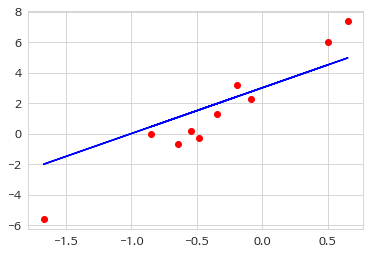

In [28]:
plt.plot(X[:, 1], y_target, 'ro')
plt.plot(X[:, 1], y_predict, 'b-')
plt.show()